# Imports

In [1]:
import torch
import platform
import numpy as np

import dlc_practical_prologue as dlc

print('Python version <{}>'.format(platform.python_version()))
print('PyTorch version <{}>'.format(torch.__version__))

Python version <3.6.8>
PyTorch version <1.0.1.post2>


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

# Data & Constants

In [3]:
N = 1000
print(f'size of training and test sets = {N}')

train_input, train_target, train_classes,\
test_input, test_target, test_classes = dlc.generate_pair_sets(N)
print(f'shape is {train_input.shape}')

size of training and test sets = 1000


/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


shape is torch.Size([1000, 2, 14, 14])


In [4]:
def show_img(img):
    plt.imshow(img)
    plt.show()

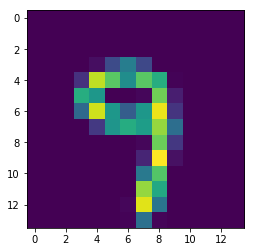

In [5]:
show_img(train_input[0, 0])

# Models

# Training

In [6]:
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as utils

from models import Baseline
from train import train_model

In [7]:
def to_dataloader(X, Y, batch_size=32):
    dset = utils.TensorDataset(X, Y) # create your datset
    return utils.DataLoader(dset, batch_size=batch_size, shuffle=True) # create your dataloader

In [17]:
dataloaders = {'train': to_dataloader(train_input, train_target),'val': to_dataloader(test_input, test_target) }
dataset_sizes = {phase:len(data) for phase, data in dataloaders.items()}
baseline_model = Baseline()
optimizer = optim.Adam(baseline_model.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

baseline_model, baseline_losses = \
train_model(dataloaders, dataset_sizes, baseline_model, 'cpu', criterion, optimizer, num_epochs=30)

Training complete in 0m 2s
Best val Loss: 16.442326
Best val Acc: 0.768555


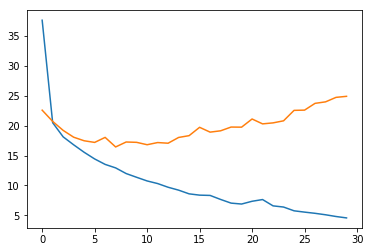

In [22]:
plt.plot(baseline_losses['train'])
plt.plot(baseline_losses['val']);